In [1]:
%matplotlib inline
import pandas as pd
import sys
import shutil
from alpenglow.experiments import BatchFactorExperiment, ExternalModelExperiment
from alpenglow.evaluation import DcgScore
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('http://info.ilab.sztaki.hu/~fbobee/alpenglow/tutorial_dataset.csv', header=None, names=['time', 'user', 'item'])

# alpenglow model

In [3]:
exp = ExternalModelExperiment(
    period_length=60 * 60 * 24 * 7 * 4,
    in_name_base="batches/batch",
    mode="read",
)

In [4]:
res = exp.run(data)

running experiment...


In [5]:
res['dcg'] = DcgScore(res)

In [6]:
res['dcg'].mean()

0.014293958938788652

# lightfm

In [7]:
exp = ExternalModelExperiment(
    period_length=60 * 60 * 24 * 7 * 4,
    in_name_base="../lightfm/batches/batch",
    mode="read",
)

In [8]:
res3 = exp.run(data)

running experiment...


In [9]:
res3['dcg'] = DcgScore(res3)

In [10]:
res3['dcg'].mean()

0.01757739322309966

# turicreate

In [11]:
exp = ExternalModelExperiment(
    period_length=60 * 60 * 24 * 7 * 4,
    in_name_base="../turicreate/batches/batch",
    mode="read",
)
res4 = exp.run(data)
res4['dcg'] = DcgScore(res4)
res4['dcg'].mean()

running experiment...


0.023746456208509535

# libfm

In [12]:
exp = ExternalModelExperiment(
    period_length=60 * 60 * 24 * 7 * 4,
    in_name_base="../libfm/batches/batch",
    mode="read",
)
res5 = exp.run(data)
res5['dcg'] = DcgScore(res5)
res5['dcg'].mean()

running experiment...


0.01446016560516256

# alpenglow batch factor model

In [13]:
exp = BatchFactorExperiment(
    period_length=60 * 60 * 24 * 7 * 4,
    negative_rate=5,
    learning_rate = 0.05,
    clear_model=True
)
res2 = exp.run(data)

running experiment...


In [14]:
res2['dcg'] = DcgScore(res2)

In [15]:
res2['dcg'].mean()

0.013916101948001271

# plotting

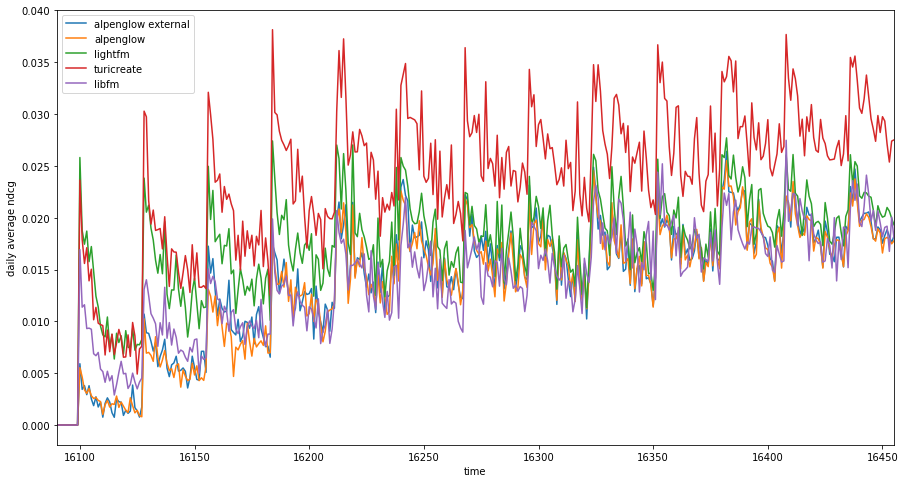

In [16]:
plt.figure(figsize=(15,8))
res.groupby(res.time//(60*60*24)).dcg.mean().plot()
res2.groupby(res2.time//(60*60*24)).dcg.mean().plot()
res3.groupby(res2.time//(60*60*24)).dcg.mean().plot()
res4.groupby(res2.time//(60*60*24)).dcg.mean().plot()
res5.groupby(res2.time//(60*60*24)).dcg.mean().plot()
plt.ylabel('daily average ndcg')
plt.legend(['alpenglow external', 'alpenglow', 'lightfm', 'turicreate', 'libfm'])